# 자전거 수요 예측

In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv("C:/Users/sim/Desktop/bike_data/train.csv")
test = pd.read_csv("C:/Users/sim/Desktop/bike_data/test.csv")
submission = pd.read_csv("C:/Users/sim/Desktop/bike_data/sampleSubmission.csv")

### 1) 데이터 확인

In [4]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


- count값이 종속변수
- casual과 registered 변수는 test와 train 데이터 안겹치니 제거

In [7]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 2) 추가 작업

In [10]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [11]:
from datetime import datetime # datetime 라이브러리 임포트
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경

# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())

# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [12]:
train['weekday'] = train['date'].apply(
    lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [13]:
train['season'] = train['season'].map({1: 'Spring',
                                      2: 'Summer',
                                      3: 'Fall',
                                      4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                        2: 'Mist, Few clouds',
                                        3: 'Light Snow, Rain, Thunderstorm',
                                        4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [14]:
# 훈련 데이터의 첫 5행을 출력해 피처 확인 
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### 3) 데이터 시각화

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\sim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'distribution map')

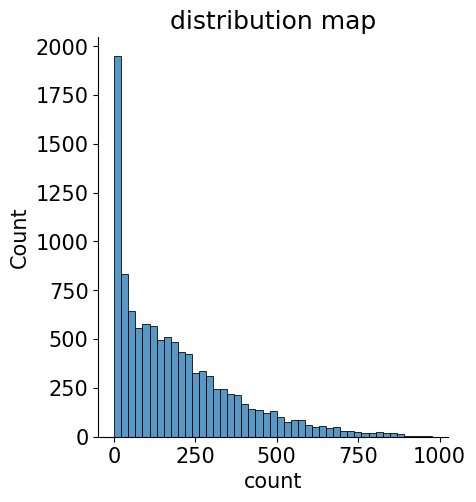

In [21]:
#수치형 데이터의 개수 분포도
mpl.rc('font', size=15)
sns.displot(train['count'])
plt.title("distribution map")
#x축은 타깃값 , y축은 총개수
#정규분포가 아님

c:\Users\sim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'log transform map')

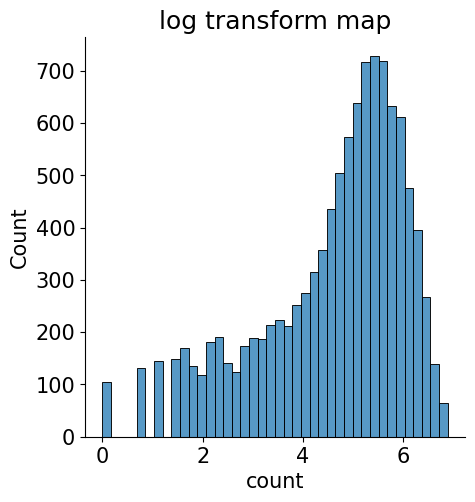

In [22]:
# count를 로그변환한 값의 분포 살펴보기
sns.displot(np.log(train['count']))
plt.title("log transform map")

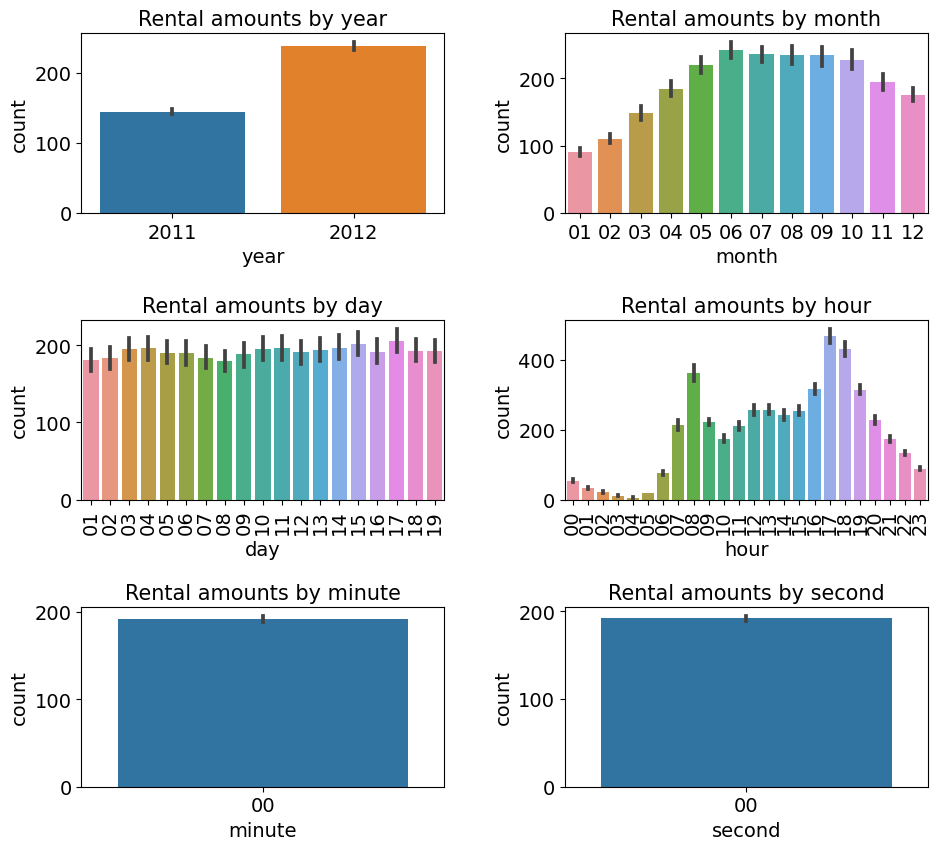

In [23]:
# 1) m행 n열 Figure 준비
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정

# 2) 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0]) # ax 파라미터에는 AxesSubplot 객체를 전달
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1]) # 0행 0열의 축부터 2행 1열의 축까지 순서대로 전달
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 3) 세부 설정
# 3-1) 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2) 1행에 위치한 서브플롯들의 x축 라벨 90도 회전 # x축 라벨이 겹치지 않게 개선
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

- 연도와 월별 데이터 및 시간별 데이터가 유의미한 것을 알 수 있다.

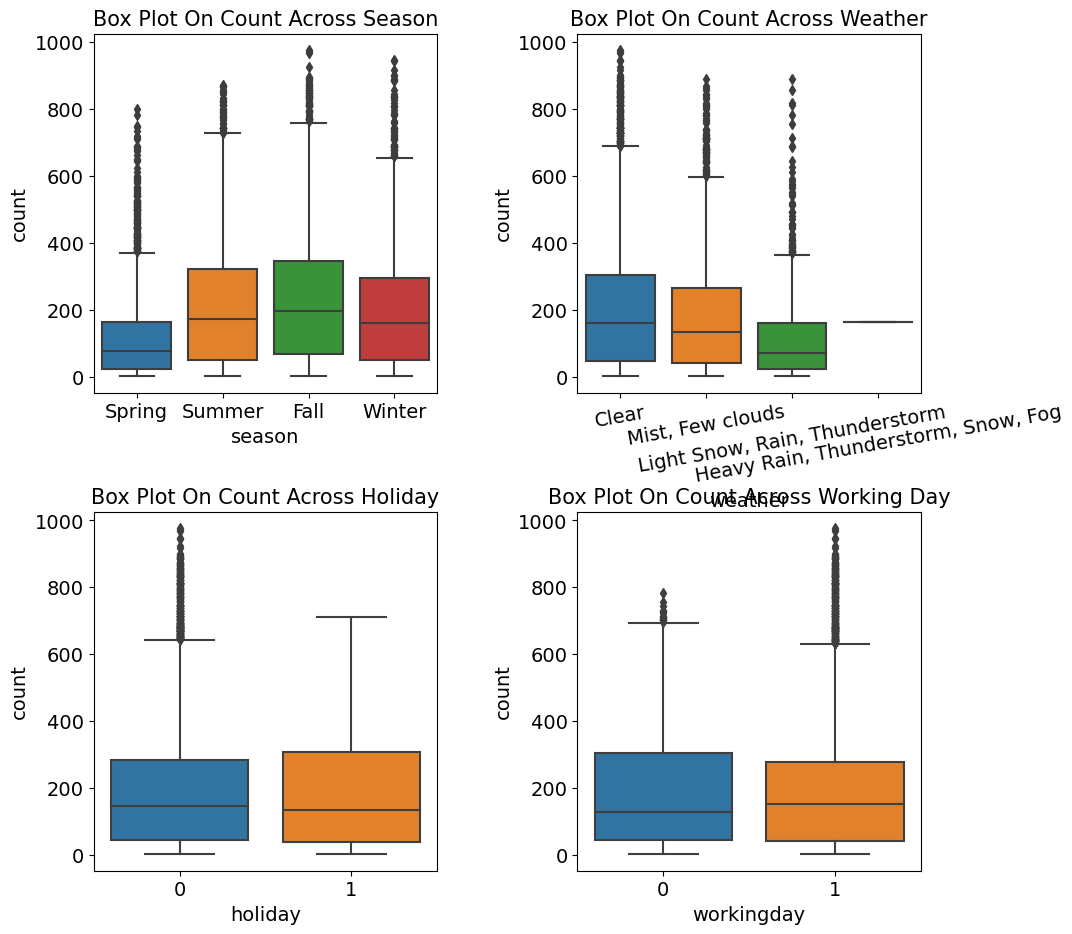

In [24]:
# 1) m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 2) 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 3) 세부 설정
# 3-1) 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2) x축 라벨 겹침 해결
axes[0, 1].tick_params(axis='x', labelrotation=10) # 10도 회전

- 계절별, 날씨별, 공휴일여부, 평일여부 확인

### 산점도 확인
- 수치형 데이터간의 상관관계 확인 전 산점도 확인

<Axes: xlabel='humidity', ylabel='count'>

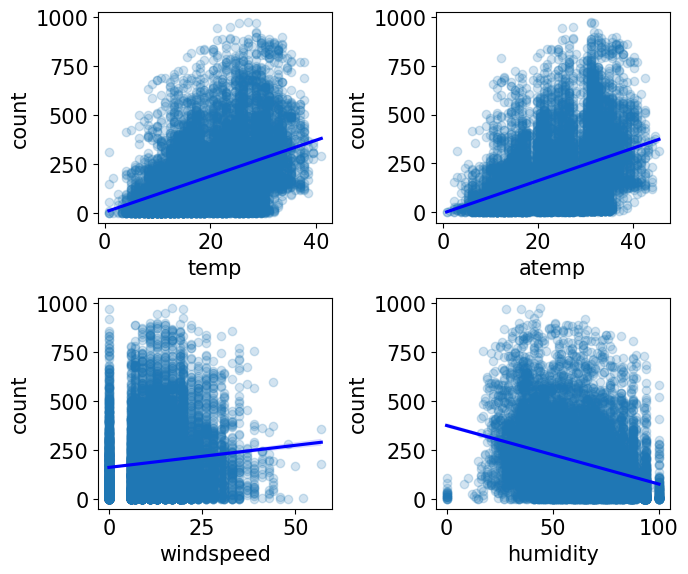

In [25]:
# 1) m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 2) 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'}) # 산점도 그래프에 찍히는 점의 투명도 조절
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'}) # 평소보다 20% 수준으로 투명해짐
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'}) # blue는 회귀선의 색상 선택
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

### 산점도 확인 후 상관계수 확인

In [26]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


### 4) 모델 설정

In [111]:
train2 = pd.read_csv("C:/Users/sim/Desktop/bike_data/train.csv")
test2 = pd.read_csv("C:/Users/sim/Desktop/bike_data/test.csv")
submission2 = pd.read_csv("C:/Users/sim/Desktop/bike_data/sampleSubmission.csv")

In [112]:
train2 = train2[train2['weather'] != 4]
all_data = pd.concat([train2, test2])
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


- 날짜랑 시간을 각각 분리

In [113]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: 
                                              x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: 
                                              x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: 
                                              x.split()[1].split(':')[0])
# 요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString : 
                                              datetime.strptime(dateString, "%Y-%m-%d").weekday())

- 필요없는 열 제거

In [114]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

- 훈련 데이터 및 테스트 데이터 구분
- 라벨인 종속변수 분리

In [115]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_train = X_train.drop(['season'], axis=1)
X_test = X_test.drop(['count'], axis=1)
X_test = X_test.drop(['season'], axis=1)

y = train2['count'] # 타깃값

In [116]:
X_train

,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,0,0,1,9.84,14.395,81,2011,00,5
1,0,0,1,9.02,13.635,80,2011,01,5
2,0,0,1,9.02,13.635,80,2011,02,5
3,0,0,1,9.84,14.395,75,2011,03,5
4,0,0,1,9.84,14.395,75,2011,04,5
...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,2012,19,2
10882,0,1,1,14.76,17.425,57,2012,20,2
10883,0,1,1,13.94,15.910,61,2012,21,2
10884,0,1,1,13.94,17.425,61,2012,22,2


In [117]:
y.head

<bound method NDFrame.head of 0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10885, dtype: int64>

In [118]:
X_train

,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,0,0,1,9.84,14.395,81,2011,00,5
1,0,0,1,9.02,13.635,80,2011,01,5
2,0,0,1,9.02,13.635,80,2011,02,5
3,0,0,1,9.84,14.395,75,2011,03,5
4,0,0,1,9.84,14.395,75,2011,04,5
...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,2012,19,2
10882,0,1,1,14.76,17.425,57,2012,20,2
10883,0,1,1,13.94,15.910,61,2012,21,2
10884,0,1,1,13.94,17.425,61,2012,22,2


### 5) 평가지표 만들기

- 기존 손실함수 MSE대신 로그를 씌운 RMSLE

In [119]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 1) 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 2) 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # 3) RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

### 6) 모델 훈련

In [120]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [121]:
log_y = np.log(y) # 타깃값(y) 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

### 7) 모델성능검증 및 결과예측

In [122]:
preds = linear_reg_model.predict(X_train)

In [123]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형 회귀의 RMSLE 값 : 1.0366


In [124]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds) # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

성능 개선 ㄱㄱ

In [126]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [127]:
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 2) 그리드처시(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, # '분류 및 회귀 모델' 릿지 모델
                                     param_grid=ridge_params, # '딕셔너리 형태로 모델의 하이퍼 파라미터명과 여러 하이퍼파라미터값을 지정' 값 목록
                                     scoring=rmsle_scorer, # '평가 지표' mertics.make_scorer를 활용해 별도로 만든 평가지표를 사용
                                     cv=5) # 교차 검증 분할 수

In [128]:
# 그리드서치 수행
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [129]:
# 최적 하이퍼파라미터로 어떤 값이 선정되었는지 보기
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 100, 'max_iter': 3000}


In [130]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)
# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값 : 1.0366


성능 개선 ㄱㄱ

In [131]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 하이퍼파라미터 값 목록
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]} # 1)
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model, 
                                     param_grid=rf_params, 
                                     scoring=rmsle_scorer, 
                                     cv=5)

# 그리드서치 수행
log_y = np.log(y) # 타깃값 로그변환
gridsearch_random_forest_model.fit(X_train, log_y) # 훈련(그리드서치)

# 최적 하이퍼파라미터로 어떤 값이 선정되었는지 보기
print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [132]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1320


<span style = "color : wihte; background-color:#008000">RMSLE값이 낮을 수록 좋다.</span>